<a href="https://colab.research.google.com/github/phuongnguyen99/TwoLayers_Neural_Network/blob/main/FNN_using_ReLu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

USE_GPU = True

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models.
print_every = 100
print('Using device: ', device)

Using device:  /device:GPU:0


**Compute Forwardpropagation and Backwardproparation for 2 layers Neural Networks**




In [ ]:
# Forward steps 

def affine_forward(x,w,b):
    """ Computes the forward pass for an affine (fully connected) layer.
    Inputs:
    - x: A numpy array containing input data of shape (N, D) where N represents for a number of minibatch
    - w: A numpy array containing weights, of shape (D,M)
    - b: A numpy array containing biases, of shape (M,)

    Return a tuple of:
    - out : output of shape (N,M)
    - cache: (x,w,b)
    """
    out = None 
    out = x.reshape(x.shape[0], -1).dot(w) + b
    cache = (x,w,b)

    return out, cache

def affine_backward(dout, cache):
    """ Computes the backward pass for an affine (fully connected) layer.
    Inputs:
    - dout: derivative of the output computed in affine_forward, of the shape (N,M)
    - cache : a tuple of 
      - x: input data, of shape (N,D)
      - w: weights, of shape (D,M)
      - b: biases, of shape (M,)

    Ouputs:
    - dx: gradient w.r.to x, of shape (N,D)
    - dw: gradient w.r.to w, of shape (D,M)
    - db: gradient w.r.to b, of shape (M,)

    """
    x, w, b = cache
    dx, dw, db = None, None, None
    dx = dout.dot(w.T).reshape(x.shape)
    dw = x.reshape(x.shape[0],-1).T.dot(dout)
    db = np.sum(dout, axis = 0)
    return dx, dw, db

# Backward steps

def relu_forward(x):
    """ Computes the forward pass for a layer of rectified linear units (ReLUs).
    Input:
    - x: A numpy array of any shape

    Output:
    - out: output, of the same shape as x
    - cache: x
    """
    out = None 
    out = np.maximum(0,x)
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """ Computes the backward pass for a layer of rectified linear units (ReLUs)
    Inputs:
    - dout: derivative of output computed in relu_forward, of any shape
    - cache: input x, of the same shape as dout

    Output:
    dx: gradient with respect to x
    """
    dx, x = None, cache
    dx = (x>0)*dout
    return dx


**Layers between affine and relu are utilized simultaneouly**

In [ ]:
def affine_relu_forward(x, w, b):

    """Convenience layer that performs an affine forward transform followed by a ReLU
    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache


def affine_relu_backward(dout, cache):
    """  Convenience layer that performs an affine backward transform followed by a ReLU
    Inputs:
    - dout: gradient from the affine layer
    - cache: a tuple obtained from the affine layer

    Outputs:
    dx: gradient with respect to x, of the shape (N,D)
    dw: gradient with respect to w, of the shape (D,M)
    db: gradient with respect to b, of the shape (M,)
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(da, fc_cache)
    return dx, dw, db



**A two-layers neural network**


In [ ]:
def two_layers_net(x,y, input_dim, H1, num_classes, lr):
    """ A two-layers neural network is built up with the following architectures:
        affine-relu-affine-MSE

    Inputs:
    x: Input data, of the shape (N,D)
    y: output data, of the shape (N,D)
    input_dim: the size of input data or the number of neruons in input
    H1: size of hidden layers or the number of neruons in hidden layer
    num_classes: the size of output data or the number of neruons in ouput
    lr: learning rate
    """
    scores = None
    np.random.seed(21)
    N = y.shape[0]
    # Initialize the weights and bisases
    W1 = np.random.randn(input_dim, H1) * np.sqrt(2/input_dim) # we have to devide with sqrt(2/number of neurons in the previous layer) because we want the weights in every layer will behave differently
    b1 = np.zeros(H1) # bias for first layer
    # Weights and biases for the seocnd layer 
    W2 = np.random.randn(H1,num_classes) * np.sqrt(2/H1)
    b2 = np.zeros(num_classes) 

    # iterate M = 100000 times to compute loss and gradients of W1, W2, b1 and b2    
    for i in range(100000):

         # forward pass
        out, cache_1 = affine_relu_forward(x, W1, b1)
        scores, cache = affine_forward(out, W2, b2)
        loss, grads = 0, {}

        # compute loss based on MSE 
        R = scores.T - y
        loss = 0.5*np.sum(R.dot(R.T))/N
        
        # gradient of scores (dscores) with respect to the loss
        dscores = R/N
        dscores= dscores.T
        
        # update the loss after ervery iteration 
        # loss +=  0.5* (np.sum(W1**2) + np.sum(W2**2))

          # backward pass: update the weights and biases based on stochastic gradient
        dout, grads_W2, grads_b2 = affine_backward(dscores, cache)
        W2  -= grads_W2 *lr
        b2 -= grads_b2*lr
        dout, grads_W1, grads_b1 = affine_relu_backward(dout, cache_1)
        W1 -= grads_W1 * lr
        b1 -= grads_b1*lr
        grads = {'W1': W1, 'b1': b1, 'W2': W2, 'b2':b2}

        
    return loss, scores

    

**Plots**

In [ ]:
x = np.linspace(0, 1,1001)
y = x+(x)**3+0.05*np.random.randn(x.shape[0])
# y = (x-0.2)**2 + np.random.randn(x.shape[0])*0
input_dim = 1
H1 = 100
num_classes = 1
loss, scores = two_layers_net(x,y, input_dim, H1, num_classes, lr = 5e-3)


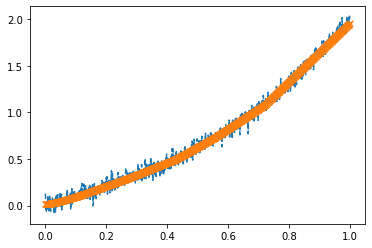

In [ ]:
plt.plot(x,y, '--')
plt.plot(x,scores, 'x')

In [ ]:
x2 = np.linspace(0, 1,1001)
y2 = np.sin(x2)+x2+(x2)**3+0.05*np.random.randn(x2.shape[0])
input_dim = 1
H1 = 40
num_classes = 1
loss2, scores2 = two_layers_net(x2,y2,input_dim, H1, num_classes,lr=1e-1)

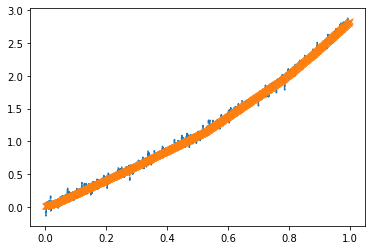

In [ ]:
plt.plot(x2,y2, '--')
plt.plot(x2,scores2, 'x')

In [ ]:
x3 = np.linspace(-1,1,600)
y3 = (x3-0.2)**2 + np.random.randn(x3.size)*0
input_dim = 1
H1 = 40
num_classes = 1
loss3, scores3 = two_layers_net(x3,y3,input_dim, H1, num_classes,lr=1e-1)


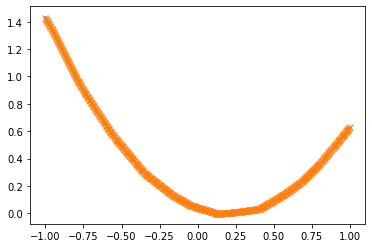

In [ ]:
plt.plot(x3,y3, '--')
plt.plot(x3,scores3, 'x')